In [1]:
# ## # For nebula torch installation for A100
# !pip3 install torch torchvision --extra-index-url https://download.pytorch.org/whl/cu113
# !pip install -r ./requirements.txt
# !pip install tensorboard

In [2]:
%config Completer.use_jedi = False
%load_ext autoreload
import re, time, os, shutil, json
from easydict import EasyDict as edict
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib
from PIL import Image
from monai.data import list_data_collate
import tempfile
import monai
from monai.data import DataLoader, Dataset 
from monai.transforms.intensity.array import ScaleIntensity
from monai.transforms import (
    LoadImage, EnsureChannelFirst, Spacing,
    RandFlip, Resize, EnsureType,
    LoadImaged, EnsureChannelFirstd,
    Resized, EnsureTyped, Compose, ScaleIntensityd, 
    AddChanneld, MapTransform, AsChannelFirstd, EnsureType, 
    Activations, AsDiscrete, RandCropByPosNegLabeld, 
    RandRotate90d, LabelToMaskd, RandFlipd, RandRotated, Spacingd, RandAffined,
    RandShiftIntensityd, Lambdad, MaskIntensityd
)
from utils import get_label, to_numpy, normalize, normalize_

from dataset import setup_dataloaders, setup_datafiles, assign_feature_maps, setup_transformations

import configdot
import torch
from monai.config import print_config
from IPython.core.debugger import set_trace
from tqdm import tqdm

def get_label(path):
    '''
    Extracts label from path, e.g.:
    '/workspace/RawData/Features/preprocessed_data/label_bernaskoni/n16.nii.gz' -> 'n16'
    '''
    return path.split('/')[-1].split('.')[0]

%autoreload 2

In [3]:
os.makedirs('./MONAI_TMP', exist_ok=True)
os.environ['MONAI_DATA_DIRECTORY'] = "./MONAI_TMP"
directory = os.environ.get("MONAI_DATA_DIRECTORY")
root_dir = tempfile.mkdtemp() if directory is None else directory
print(root_dir)

./MONAI_TMP


# Create dataset

In [4]:
config = configdot.parse_config('configs/config.ini')

In [5]:
print(torch.cuda.is_available())
DEVICE = config.opt.device if hasattr(config.opt, "device") else 0
device = torch.device(DEVICE)
if DEVICE != 'cpu':
    torch.cuda.set_device(DEVICE)

print('Setting GPU#:', DEVICE)
print('Using GPU#:', torch.cuda.current_device())

True
Setting GPU#: 1
Using GPU#: 1


### Loading train-test split


In [6]:
# subjects_list = np.load('./metadata/metadata_fcd_nG.npy', allow_pickle=True).item()
# train_list = subjects_list.get('train')
# val_list = subjects_list.get('test')

# feat_params = config.dataset.features

# print(len(train_list), len(val_list))

In [ ]:
# feat_params

In [ ]:
# # train_loader, val_loader = setup_dataloaders(config)
# train_files, val_files = setup_datafiles(subjects_list, config)

### Transformation and Augmentation

In [ ]:
# assert config.default.interpolate
# spatial_size_conf = tuple(config.default.interpolation_size)
# #masked = config.dataset.trim_background
# masked = True

# def masked_transform(data_dict):
#     data_dict["image"] = data_dict["image"] * data_dict["mask"]
#     return data_dict

# if masked:
#     keys=["image", "seg", "mask"]
#     sep_k=["seg", "mask"]
# else:
#     keys=["image", "seg"]
#     sep_k=["seg"]

# if config.opt.augmentation:
#     rot_range = 0.5 

#     train_transf = Compose(
#         [
#             LoadImaged(keys=keys),
#             EnsureChannelFirstd(keys=keys),
#             RandRotated(keys=keys, 
#                         range_x=rot_range, 
#                         # range_y=rot_range, 
#                         # range_z=rot_range, 
#                         prob=1),
#             RandFlipd(keys=keys, prob=0.5, spatial_axis=0),
#             Spacingd(keys=sep_k, pixdim=1.0),
#             Resized(keys=keys, spatial_size=spatial_size_conf),
#             ScaleIntensityd(keys=["image"], minv=0.0, maxv=1.0, channel_wise=True),
#             # masked_transform,
#             EnsureTyped(keys=keys, dtype=torch.float)
#         ]
#     )

#     val_transf = Compose(
#         [
#                 LoadImaged(keys=keys),
#                 EnsureChannelFirstd(keys=keys),
#                 Spacingd(keys=sep_k, pixdim=1.0),
#                 Resized(keys=keys, spatial_size=spatial_size_conf),
#                 ScaleIntensityd(keys=["image"], minv=0.0, maxv=1.0, channel_wise=True),
#                 # masked_transform,
#                 EnsureTyped(keys=keys, dtype=torch.float),
#             ]
#     )
    
# else:
#     raise NotImplementedError

In [ ]:
# config.opt.augmentation

### Visualization

In [ ]:
# check_batch_size = 2
# check_dataset = Dataset(data=train_files, transform=train_transf)
# check_loader = DataLoader(check_dataset, 
#                           batch_size=check_batch_size, 
#                           num_workers=0, 
#                           collate_fn=list_data_collate, 
#                           pin_memory=torch.cuda.is_available(),
#                           shuffle=True
#                           )

# check_data = monai.utils.misc.first(check_loader)
# # check_data = monai.utils.misc.first(train_loader)

In [ ]:
# for check_data_sample in check_dataset:
#     break

In [ ]:
# check_data['image'][:,1,...]

In [ ]:
# check_data['image'][:,1,...]

In [ ]:
# for k in range(check_batch_size):
    
#     image = check_data['image'][k]
#     seg = check_data['seg'][k]
#     mask = check_data['mask'][k]
#     label = get_label(check_dataset.data[k]['seg'])
    
#     print(f"image shape: {image.shape}")
    
#     num_of_channels = len(feat_params)
#     # choose z-coord where there is a label maximum over other axes
#     label_pos = (seg > 0).sum(dim=(0,1,2)).argmax().item()
    
#     #mask = image[:1,...] <= 0 # `background mask
    
#     torch.sum(mask * image, dim=(-1,-2,-3)).type(torch.int) > 1

#     fig = plt.figure("image", (10, 5), dpi=200)
#     ax1 = plt.subplot(1, 2, 1)
#     #plt.title(f"{feat_params[i]}")
#     ax1.imshow(image[1,:,:,label_pos], cmap='gray')
#     ax2 = plt.subplot(1, 2, 2)
#     ax2.imshow(mask[0,:,:,label_pos], alpha=0.5)
    
#     # plt.colorbar()
#     plt.xticks([])
#     plt.yticks([])
        
#     fig.suptitle(label, fontsize=20, color='blue')
#     # plt.tight_layout()
#     plt.show()
#     if k > 2:
#         break

In [ ]:
# np.array(feat_params)[torch.sum(mask * image, dim=(-1,-2,-3)).type(torch.int) > 1]

In [ ]:
# for k in range(check_batch_size):
    
#     image = check_data['image'][k]
#     seg = check_data['seg'][k]
#     label = get_label(check_dataset.data[k]['seg'])
    
#     print(f"image shape: {image.shape}")
    
#     num_of_channels = len(feat_params)
#     # choose z-coord where there is a label maximum over other axes
#     label_pos = (seg > 0).sum(dim=(0,1,2)).argmax().item()
    
#     mask = image[:1,...] <= 0 # `background mask
#     torch.sum(mask * image, dim=(-1,-2,-3)).type(torch.int) > 1

#     fig = plt.figure("image", (5, 5), dpi=200)
    
#     plt.subplot(1, 1, 1)
#     image_bin = image[-2,:,:,label_pos] > 0
#     plt.imshow(image_bin, cmap='gray')
#     plt.colorbar()
#     #plt.title(f"{feat_params[i]}, {image_bin.sum()}")
#     # plt.imshow(seg[0,:,:,label_pos], interpolation='none', cmap='Reds', alpha=0.3)
#     # plt.imshow(seg[0,:,:,label_pos], interpolation='none', cmap='Reds', alpha=0.3)
#     plt.xticks([])
#     plt.yticks([])
        
#     fig.suptitle(label, fontsize=20, color='blue')
#     # plt.tight_layout()
#     plt.show()

In [7]:
# figures_per_row = 6 # for visualization
# for k in range(check_batch_size):
    
#     image = check_data['image'][k]
#     seg = check_data['seg'][k]
#     label = get_label(check_dataset.data[k]['seg'])
    
#     print(f"image shape: {image.shape}")
    
#     num_of_channels = len(feat_params)
#     # choose z-coord where there is a label maximum over other axes
#     label_pos = (seg > 0).sum(dim=(0,1,2)).argmax().item()
    
#     mask = image[:1,...] <= 0 # `background mask
#     torch.sum(mask * image, dim=(-1,-2,-3)).type(torch.int) > 1

#     fig = plt.figure("image", (len(feat_params), 5), dpi=200)
#     for i in range(num_of_channels):
#         nrows = int(np.ceil(num_of_channels/figures_per_row))
#         cols = num_of_channels%figures_per_row
#         plt.subplot(nrows, figures_per_row, i+1)
#         plt.title(f"{feat_params[i]}")
#         plt.imshow(image[i,:,:,label_pos] > 0, cmap="gray")
#         # plt.imshow(seg[0,:,:,label_pos], interpolation='none', cmap='Reds', alpha=0.3)
#         # plt.imshow(seg[0,:,:,label_pos], interpolation='none', cmap='Reds', alpha=0.3)
#         plt.xticks([])
#         plt.yticks([])
        
#     fig.suptitle(label, fontsize=20, color='blue')
#     # plt.tight_layout()
#     plt.show()

# Check dataloaders

In [7]:
config = configdot.parse_config('configs/config.ini')
train_loader, val_loader = setup_dataloaders(config)

Train set length: 80
Test set length: 10


In [8]:
for data in train_loader:
    break

In [10]:
data['image'][:,1,...].shape()

TypeError: 'torch.Size' object is not callable

In [ ]:
data['image'][:,0,...].max()

In [27]:
# metadata_path = config.dataset.metadata_path
# split_dict = np.load(metadata_path, allow_pickle=True).item()   

# train_files, val_files = setup_datafiles(split_dict, config)
# train_transf, val_transf = setup_transformations(config)

# # training dataset
# train_ds = monai.data.Dataset(data=train_files, transform=train_transf)
# train_loader = DataLoader(
#     train_ds,
#     batch_size=config.opt.train_batch_size,
#     shuffle=config.dataset.shuffle_train,
#     num_workers=0,
#     collate_fn=list_data_collate,
#     pin_memory=torch.cuda.is_available(),
# )

# # validation dataset
# val_ds = monai.data.Dataset(data=val_files, transform=val_transf)
# val_loader = DataLoader(val_ds, 
#                         batch_size=config.opt.val_batch_size, 
#                         num_workers=0, 
#                         collate_fn=list_data_collate,
#                         shuffle=False # important not to shuffle, to ensure label correspondence
#                         )

Train set length: 80
Test set length: 10


In [ ]:
# fig, axes = plt.subplots(ncols=5,nrows=2, sharex=True, sharey=True, figsize=(25,10),dpi=200)
# axes = axes.flatten()
# for i,batch in enumerate(train_loader):
#     if i >= 10:
#         break
#     else:
#         img = to_numpy(batch['image'][0,0][:,:,64])
#         axes[i].imshow(img)
# plt.xticks([])
# plt.yticks([])

# plt.show()

In [13]:
bs = data['image'].shape[0]w
nbins=50
hists = []
x_s = []
for i in tqdm(range(bs)):
    f_tensor = to_numpy(data['image'][0,1])
    mask = to_numpy(data['mask'][i,0])
    hist, bins = np.histogram(f_tensor[mask > 0], bins=nbins)
    hists.append(hist)
    x_s.append(bins)

100%|██████████| 80/80 [00:00<00:00, 106.04it/s]


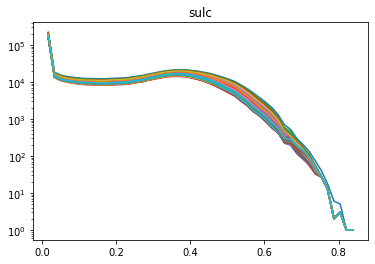

In [14]:
plt.figure()
for x_i, hist_i in zip(x_s, hists):
    plt.plot(x_i[1:], hist_i)
plt.yscale('log')
plt.title('sulc')
plt.show()

In [1]:
# plt.plot(np.linspace(1e-10,1,nbins), h1, alpha=0.5) # , align='edge'
# plt.plot(np.linspace(1e-10,1,nbins), h2, alpha=0.2)
# # plt.xticks(np.arange(100)[::20], np.linspace(0,1,100)[::20])
# # plt.xticks(np.linspace(0,1,100)[::20], np.linspace(0,1,100)[::20])

In [8]:
# image = data['image'][0,0]
# curv = data['image'][0,1]

# plt.hist(image[mask > 0] ,bins=50, alpha=0.5)
# plt.hist(curv[mask > 0] ,bins=50, alpha=0.5)
# plt.show()

In [34]:
def show_prediction_slice(b_ind=0, c_ind=0):
    
    '''
    b_ind - batch_index
    c_ind - channel index for `brain_tensor`
    brain_tensor - [bs,C,1,H,W,D]
    mask_tensor - [bs,1,1,H,W,D]
    label_tensor - [bs,1,1,H,W,D]
    label_tensor_predicted - [bs,1,1,H,W,D]
    '''
    
    label_pos = (label_tensor[b_ind,0] > 0).sum(dim=(0,1)).argmax().item()
    
    fig = plt.figure("image", (3*5, 5), dpi=100)
    
    ax1 = plt.subplot(1, 3, 1)
    ax1.imshow(to_numpy(brain_tensor[b_ind,c_ind,:,:,label_pos]), cmap='gray')
    # ax1.imshow(to_numpy(mask_tensor[b_ind,0,:,:,label_pos]), alpha=0.2, cmap='Reds')
    ax1.imshow(to_numpy(label_tensor[b_ind,0,:,:,label_pos]), alpha=0.6, cmap='Reds')
    
    ax2 = plt.subplot(1, 3, 2)
    ax2.imshow(to_numpy(brain_tensor[b_ind,c_ind,:,:,label_pos]), cmap='gray')
    # ax2.imshow(to_numpy(mask_tensor[b_ind,0,:,:,label_pos]), alpha=0.2, cmap='Reds')
    ax2.imshow(to_numpy(label_tensor_predicted[b_ind,0,:,:,label_pos]), alpha=0.6, cmap='Reds')
    
    ax3 = plt.subplot(1, 3, 3)
    ax3.imshow(to_numpy(mask_tensor[b_ind,0,:,:,label_pos]), cmap='jet')
    
    plt.xticks([])
    plt.yticks([])
    
    plt.show()

In [ ]:
!python train_seg.py

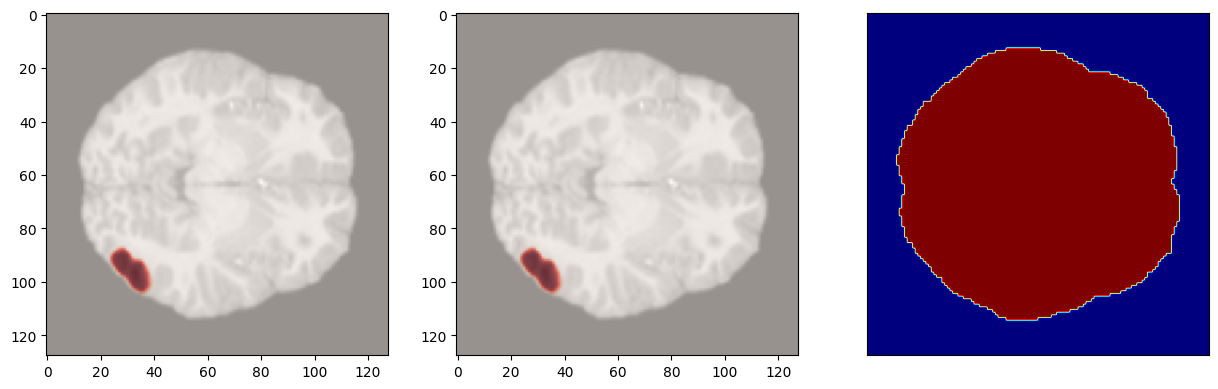

In [35]:
for data_tensors in val_loader_aug:
    brain_tensor, label_tensor, mask_tensor = (
                                                data_tensors['image'].to(device),
                                                data_tensors['seg'].to(device),
                                                data_tensors['mask'].to(device)
                                                )
label_tensor_predicted = label_tensor

show_prediction_slice()

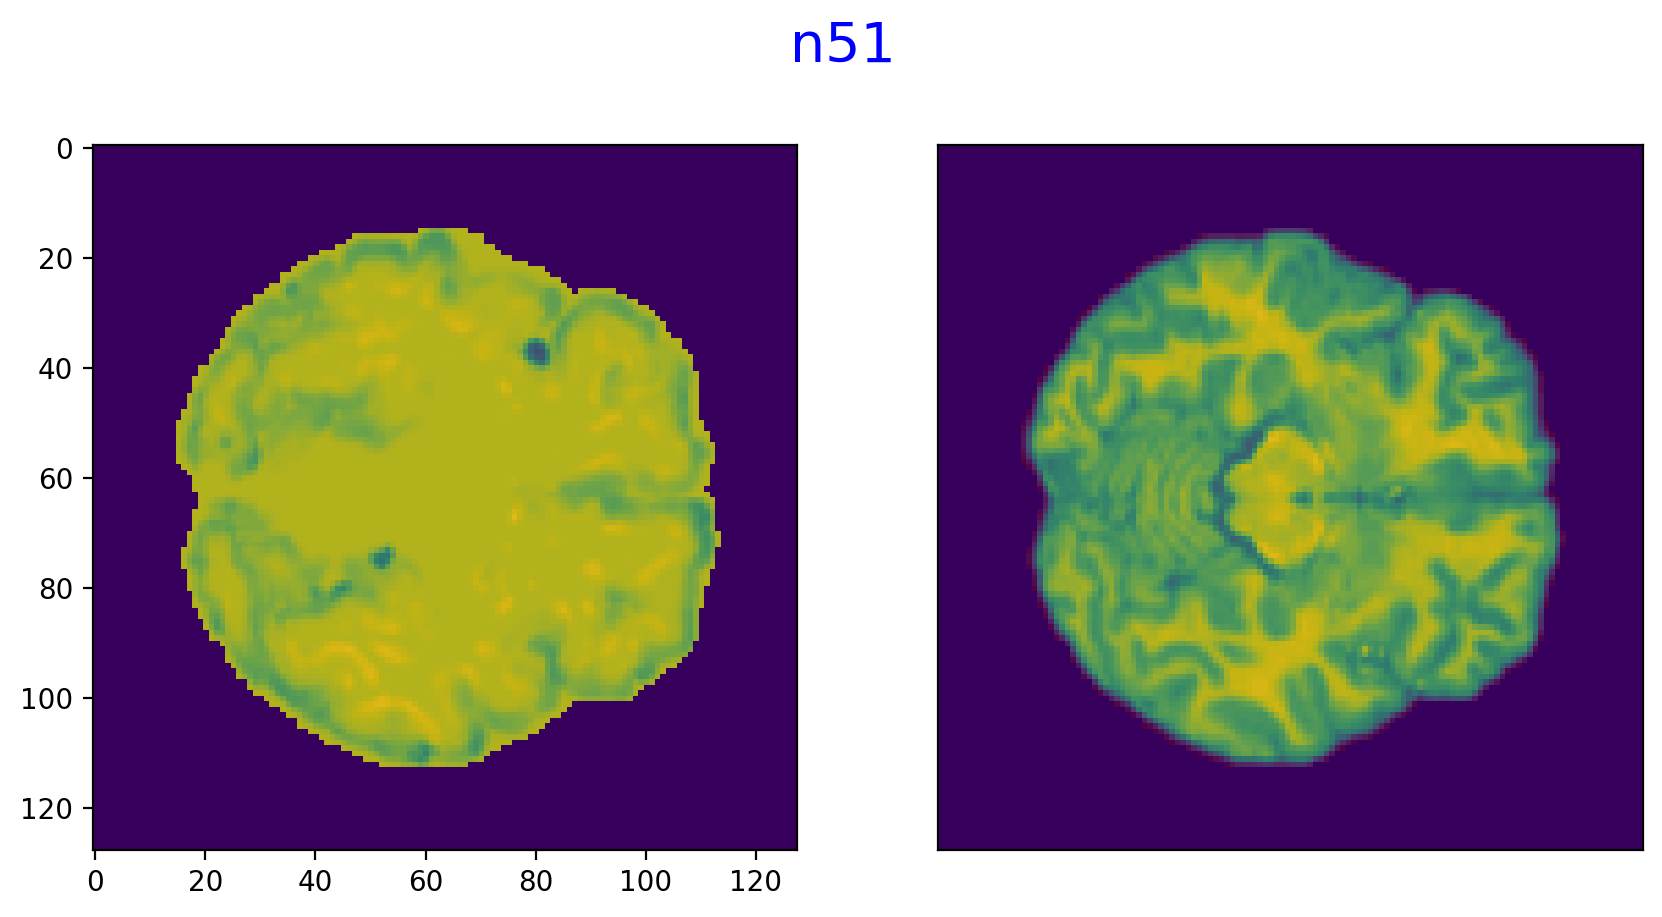

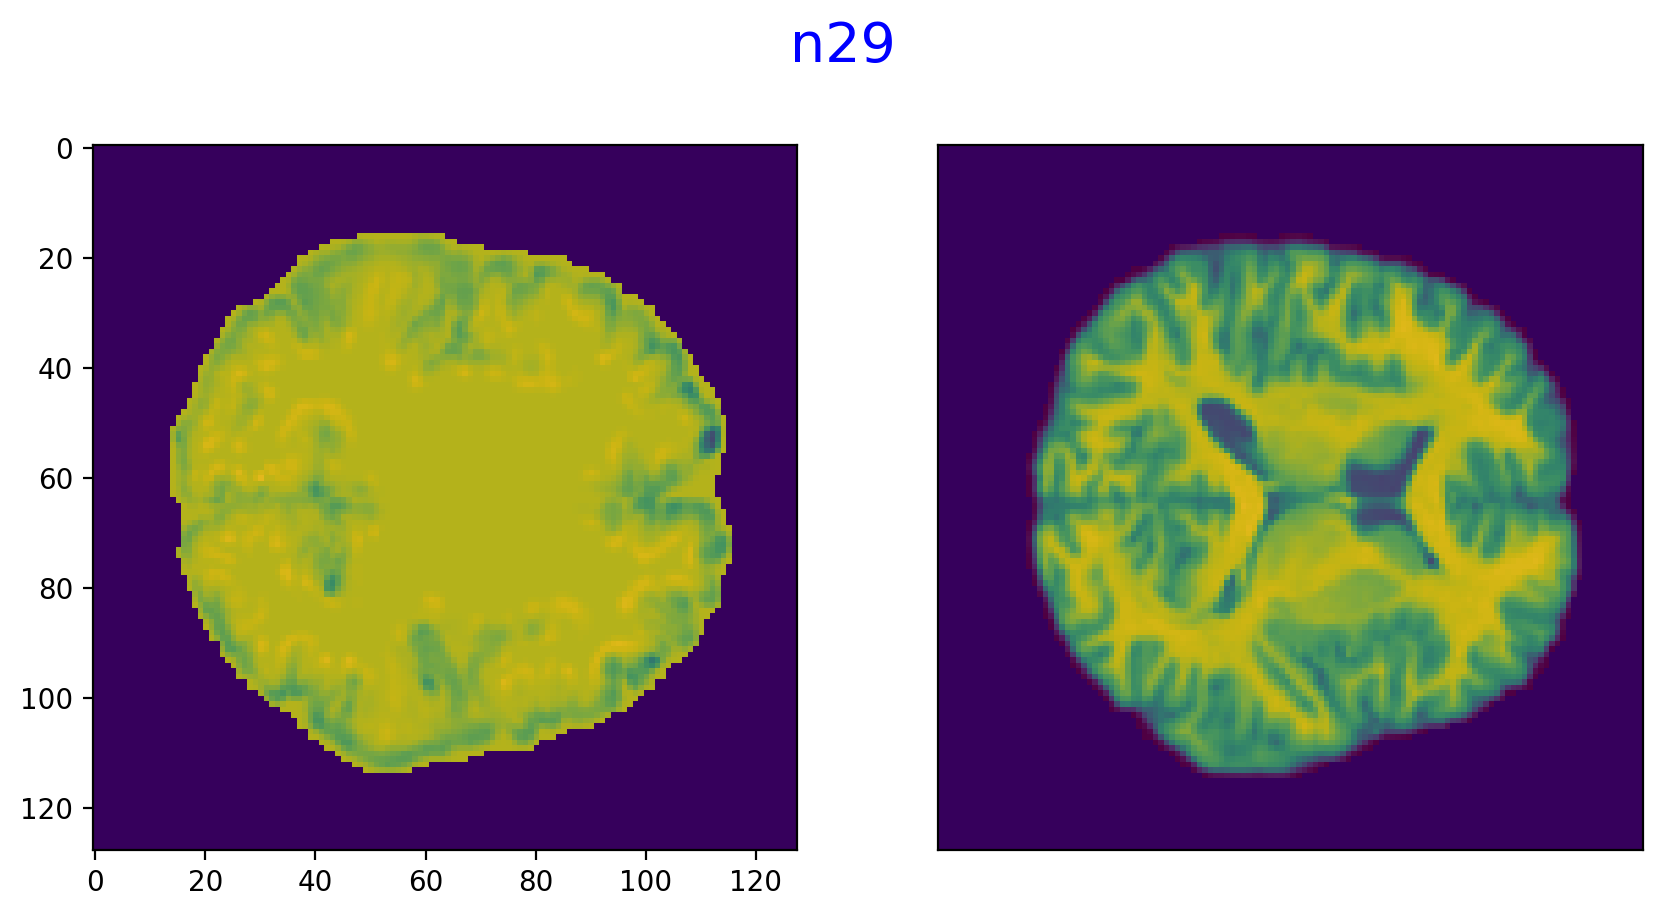

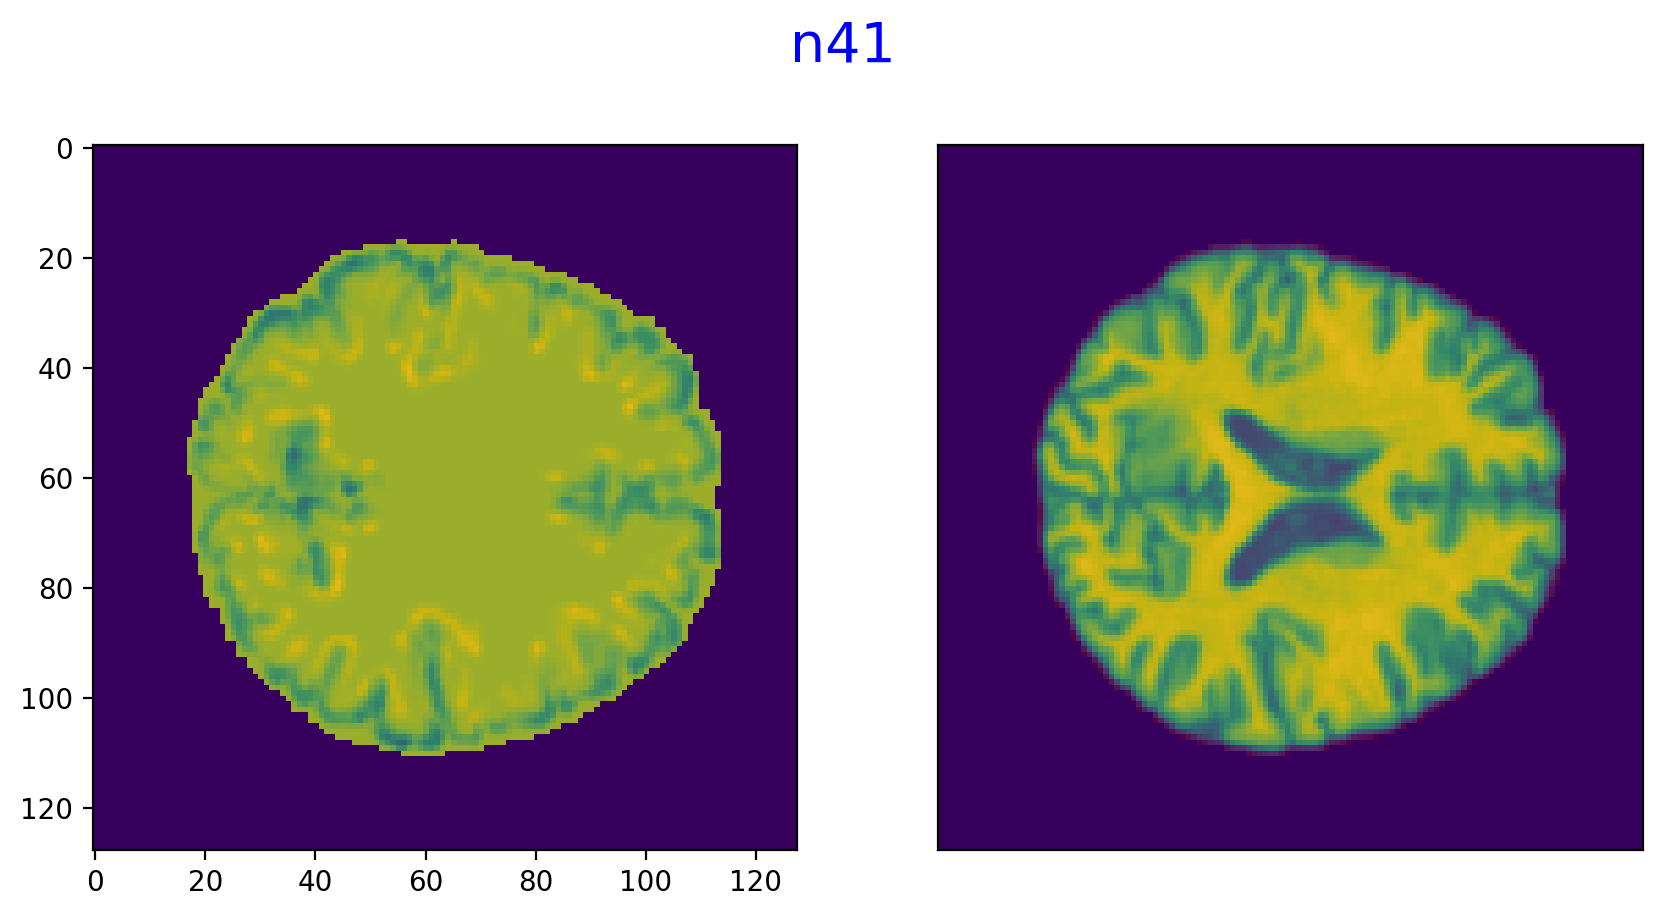

In [20]:
for k,(data, data_aug) in enumerate(zip(val_loader, val_loader_aug)):

    image = data['image'][0,1] 
    image_aug = data_aug['image'][0,0]
    
    seg = data['seg'][0,0]
    seg_aug = data_aug['seg'][0,0]
    
    mask = data['mask'][0,0]
    mask_aug = data_aug['mask'][0,0]
    
    label = get_label(val_loader.dataset.data[k]['seg'])
    
    # choose z-coord where there is a label maximum over other axes
    label_pos = (seg > 0).sum(dim=(0,1)).argmax().item()
    
    fig = plt.figure("image", (2*5, 5), dpi=200)

    ax1 = plt.subplot(1, 2, 1)
    ax1.imshow(image[:,:,label_pos]) # , cmap='gray'
    ax1.imshow(mask[:,:,label_pos], alpha=0.2, cmap='jet')
    
    ax2 = plt.subplot(1, 2, 2)
    ax2.imshow(image_aug[:,:,label_pos]) # , cmap='gray'
    ax2.imshow(mask_aug[:,:,label_pos], alpha=0.2, cmap='jet')
    
    # plt.colorbar()
    plt.xticks([])
    plt.yticks([])
        
    fig.suptitle(label, fontsize=20, color='blue')
    # plt.tight_layout()
    plt.show()
    
    if k > 1:
        break

In [17]:
# data['image'][0,0]

In [ ]:
# # uncomment to check non-zero backgrounds in dataloader

# features_cumsum = torch.zeros(len(config.dataset.features))
# for train_batch in tqdm(train_loader):
#     features_cumsum += train_batch['image'].sum(0)[:,:5,:5,:5].sum(dim=(-1,-2,-3))
# for val_batch in tqdm(val_loader):
#     features_cumsum += val_batch['image'].sum(0)[:,:5,:5,:5].sum(dim=(-1,-2,-3))
# np.array(config.dataset.features)[features_cumsum > 0]

In [ ]:
n_features = check_data['image'].shape[1]

In [ ]:
mask = check_data['mask']
mask.unique()

In [ ]:
for k in range(2):
    
    image = check_data['image'][k]
    seg = check_data['seg'][k]
    mask = check_data['mask'][k]
    label = get_label(train_ds.data[k]['seg'])
    
    print(f"image shape: {image.shape}")
    
    # choose z-coord where there is a label maximum over other axes
    label_pos = (seg > 0).sum(dim=(0,1,2)).argmax().item()
    
    fig = plt.figure("image", (n_features*5, 5), dpi=200)
    for i in range(n_features):
        ax1 = plt.subplot(1, n_features, i+1)
        ax1.imshow(image[i,:,:,label_pos], cmap='gray')
        # ax2 = plt.subplot(1, 2*n_features, i+1)
        ax1.imshow(mask[0,:,:,label_pos], alpha=0.2, cmap='jet')
    
    # plt.colorbar()
    plt.xticks([])
    plt.yticks([])
        
    fig.suptitle(label, fontsize=20, color='blue')
    # plt.tight_layout()
    plt.show()
    if k > 2:
        break